In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime as dt

In [2]:
##1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to
##keep all customers who have done transactions with us and select the join type accordingly

Inp1=pd.read_csv(r'C:\Users\goura\Downloads\Compressed\Gaurav_data_science\Basic Python Stats Modelling\Assignments\Case Studies\Case Study Retail\3. Pandas Case Study 1 - Retail Case Study\Customer.csv')
Inp2=pd.read_csv(r'C:\Users\goura\Downloads\Compressed\Gaurav_data_science\Basic Python Stats Modelling\Assignments\Case Studies\Case Study Retail\3. Pandas Case Study 1 - Retail Case Study\Transactions.csv')
Inp3=pd.read_csv(r'C:\Users\goura\Downloads\Compressed\Gaurav_data_science\Basic Python Stats Modelling\Assignments\Case Studies\Case Study Retail\3. Pandas Case Study 1 - Retail Case Study\prod_cat_info.csv')

In [3]:
Inp1.head(2)

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0


In [4]:
Inp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5647 entries, 0 to 5646
Data columns (total 4 columns):
customer_Id    5647 non-null int64
DOB            5647 non-null object
Gender         5645 non-null object
city_code      5645 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 176.6+ KB


In [5]:
len(Inp1.customer_Id.unique())

5647

In [6]:
len(Inp2.cust_id.unique())

5506

In [7]:
Inp2.head(2)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop


In [8]:
Inp2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23053 entries, 0 to 23052
Data columns (total 10 columns):
transaction_id      23053 non-null int64
cust_id             23053 non-null int64
tran_date           23053 non-null object
prod_subcat_code    23053 non-null int64
prod_cat_code       23053 non-null int64
Qty                 23053 non-null int64
Rate                23053 non-null int64
Tax                 23053 non-null float64
total_amt           23053 non-null float64
Store_type          23053 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.8+ MB


In [9]:
Inp3.head(3)

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids


In [10]:
Inp3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 4 columns):
prod_cat_code        23 non-null int64
prod_cat             23 non-null object
prod_sub_cat_code    23 non-null int64
prod_subcat          23 non-null object
dtypes: int64(2), object(2)
memory usage: 864.0+ bytes


In [11]:
df_merge=pd.merge(Inp2,Inp3,on='prod_cat_code')

In [12]:
df_merge.head(2)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.3,-4265.3,e-Shop,Clothing,4,Mens
1,80712190438,270351,28-02-2014,1,1,-5,-772,405.3,-4265.3,e-Shop,Clothing,1,Women


In [13]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99293 entries, 0 to 99292
Data columns (total 13 columns):
transaction_id       99293 non-null int64
cust_id              99293 non-null int64
tran_date            99293 non-null object
prod_subcat_code     99293 non-null int64
prod_cat_code        99293 non-null int64
Qty                  99293 non-null int64
Rate                 99293 non-null int64
Tax                  99293 non-null float64
total_amt            99293 non-null float64
Store_type           99293 non-null object
prod_cat             99293 non-null object
prod_sub_cat_code    99293 non-null int64
prod_subcat          99293 non-null object
dtypes: float64(2), int64(7), object(4)
memory usage: 10.6+ MB


In [14]:
## when we merge two data frame using outer join than there are chances that null(NaN) value appear after join and
## int64 is not able to store NaN values hence the new data frame has float values.

## Eg:-If we perform merge operation(outer join) on Inp1 and df_merge on customer_id/cust_id without changing the dtype of 
## cust_id that after join dtype of cust_id will be float although earlier it was int64.
## Int64 can store NaN values.

df_merge.cust_id=df_merge.cust_id.astype('Int64')

In [15]:
Customer_Final=pd.merge(Inp1,df_merge,how='outer',left_on='customer_Id',right_on='cust_id')

In [16]:
Customer_Final.head(2)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,02-01-1970,M,4.0,6.331455e+10,268408,26-04-2012,1.0,1.0,1.0,806.0,84.63,890.63,Flagship store,Clothing,4.0,Mens
1,268408,02-01-1970,M,4.0,6.331455e+10,268408,26-04-2012,1.0,1.0,1.0,806.0,84.63,890.63,Flagship store,Clothing,1.0,Women


In [17]:
## why cust_id is float when in original data set it is integer

In [18]:
Customer_Final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99434 entries, 0 to 99433
Data columns (total 17 columns):
customer_Id          99434 non-null int64
DOB                  99434 non-null object
Gender               99394 non-null object
city_code            99398 non-null float64
transaction_id       99293 non-null float64
cust_id              99293 non-null Int64
tran_date            99293 non-null object
prod_subcat_code     99293 non-null float64
prod_cat_code        99293 non-null float64
Qty                  99293 non-null float64
Rate                 99293 non-null float64
Tax                  99293 non-null float64
total_amt            99293 non-null float64
Store_type           99293 non-null object
prod_cat             99293 non-null object
prod_sub_cat_code    99293 non-null float64
prod_subcat          99293 non-null object
dtypes: Int64(1), float64(9), int64(1), object(6)
memory usage: 13.8+ MB


In [19]:
##2. Prepare a summary report for the merged data set.
##a. Get the column names and their corresponding data types

In [20]:
Customer_Final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99434 entries, 0 to 99433
Data columns (total 17 columns):
customer_Id          99434 non-null int64
DOB                  99434 non-null object
Gender               99394 non-null object
city_code            99398 non-null float64
transaction_id       99293 non-null float64
cust_id              99293 non-null Int64
tran_date            99293 non-null object
prod_subcat_code     99293 non-null float64
prod_cat_code        99293 non-null float64
Qty                  99293 non-null float64
Rate                 99293 non-null float64
Tax                  99293 non-null float64
total_amt            99293 non-null float64
Store_type           99293 non-null object
prod_cat             99293 non-null object
prod_sub_cat_code    99293 non-null float64
prod_subcat          99293 non-null object
dtypes: Int64(1), float64(9), int64(1), object(6)
memory usage: 13.8+ MB


In [21]:
##b. Top/Bottom 10 observations

Customer_Final.head(10)


,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,02-01-1970,M,4.0,6.331455e+10,268408,26-04-2012,1.0,1.0,1.0,806.0,84.63,890.63,Flagship store,Clothing,4.0,Mens
1,268408,02-01-1970,M,4.0,6.331455e+10,268408,26-04-2012,1.0,1.0,1.0,806.0,84.63,890.63,Flagship store,Clothing,1.0,Women
2,268408,02-01-1970,M,4.0,6.331455e+10,268408,26-04-2012,1.0,1.0,1.0,806.0,84.63,890.63,Flagship store,Clothing,3.0,Kids
3,268408,02-01-1970,M,4.0,5.690286e+10,268408,30-01-2013,9.0,3.0,5.0,868.0,455.70,4795.70,e-Shop,Electronics,4.0,Mobiles
4,268408,02-01-1970,M,4.0,5.690286e+10,268408,30-01-2013,9.0,3.0,5.0,868.0,455.70,4795.70,e-Shop,Electronics,5.0,Computers
5,268408,02-01-1970,M,4.0,5.690286e+10,268408,30-01-2013,9.0,3.0,5.0,868.0,455.70,4795.70,e-Shop,Electronics,8.0,Personal Appliances
6,268408,02-01-1970,M,4.0,5.690286e+10,268408,30-01-2013,9.0,3.0,5.0,868.0,455.70,4795.70,e-Shop,Electronics,9.0,Cameras
7,268408,02-01-1970,M,4.0,5.690286e+10,268408,30-01-2013,9.0,3.0,5.0,868.0,455.70,4795.70,e-Shop,Electronics,10.0,Audio and video
8,268408,02-01-1970,M,4.0,1.951606e+10,268408,7/9/2012,10.0,3.0,4.0,650.0,273.00,2873.00,e-Shop,Electronics,4.0,Mobiles
9,268408,02-01-1970,M,4.0,1.951606e+10,268408,7/9/2012,10.0,3.0,4.0,650.0,273.00,2873.00,e-Shop,Electronics,5.0,Computers


In [22]:
Customer_Final.tail(10)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
99424,274308,29-12-1992,F,5.0,5.816054e+10,274308,4/7/2012,12.0,5.0,5.0,588.0,308.70,3248.70,e-Shop,Books,10.0,Non-Fiction
99425,274308,29-12-1992,F,5.0,5.816054e+10,274308,4/7/2012,12.0,5.0,5.0,588.0,308.70,3248.70,e-Shop,Books,11.0,Children
99426,274308,29-12-1992,F,5.0,5.816054e+10,274308,4/7/2012,12.0,5.0,5.0,588.0,308.70,3248.70,e-Shop,Books,3.0,Comics
99427,274308,29-12-1992,F,5.0,5.816054e+10,274308,4/7/2012,12.0,5.0,5.0,588.0,308.70,3248.70,e-Shop,Books,6.0,DIY
99428,274308,29-12-1992,F,5.0,2.620869e+10,274308,22-10-2012,1.0,2.0,2.0,898.0,188.58,1984.58,MBR,Footwear,1.0,Mens
99429,274308,29-12-1992,F,5.0,2.620869e+10,274308,22-10-2012,1.0,2.0,2.0,898.0,188.58,1984.58,MBR,Footwear,3.0,Women
99430,274308,29-12-1992,F,5.0,2.620869e+10,274308,22-10-2012,1.0,2.0,2.0,898.0,188.58,1984.58,MBR,Footwear,4.0,Kids
99431,274308,29-12-1992,F,5.0,5.735882e+10,274308,5/9/2012,1.0,2.0,4.0,876.0,367.92,3871.92,e-Shop,Footwear,1.0,Mens
99432,274308,29-12-1992,F,5.0,5.735882e+10,274308,5/9/2012,1.0,2.0,4.0,876.0,367.92,3871.92,e-Shop,Footwear,3.0,Women
99433,274308,29-12-1992,F,5.0,5.735882e+10,274308,5/9/2012,1.0,2.0,4.0,876.0,367.92,3871.92,e-Shop,Footwear,4.0,Kids


In [23]:
##c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)

Customer_Final.describe()

,customer_Id,city_code,transaction_id,cust_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,prod_sub_cat_code
count,99434.000000,99398.000000,9.929300e+04,99293.000000,99293.000000,99293.000000,99293.000000,99293.000000,99293.000000,99293.000000,99293.000000
mean,271030.200173,5.466700,5.007320e+10,271030.010635,6.796894,4.003243,2.438017,637.919884,248.873736,2114.616420,6.806985
std,2429.256505,2.859436,2.899361e+10,2429.333624,3.609439,1.563991,2.260726,621.576326,187.014422,2502.306768,3.615952
min,266783.000000,1.000000,3.268991e+06,266783.000000,1.000000,1.000000,-5.000000,-1499.000000,7.350000,-8270.925000,1.000000
25%,268956.000000,3.000000,2.492150e+10,268956.000000,4.000000,3.000000,1.000000,313.000000,98.280000,762.450000,4.000000
50%,270982.000000,5.000000,5.011083e+10,270982.000000,7.000000,5.000000,3.000000,713.000000,199.920000,1761.370000,7.000000
75%,273120.000000,8.000000,7.528121e+10,273120.000000,10.000000,5.000000,4.000000,1109.000000,366.975000,3585.725000,10.000000
max,275265.000000,10.000000,9.998755e+10,275265.000000,12.000000,6.000000,5.000000,1500.000000,787.500000,8287.500000,12.000000


In [24]:
def Conti_vars_Summary(x):
    return (pd.Series([x.min(),x.quantile(0.25),x.median(),x.quantile(0.75),x.max()],index=['MIN','Q1','MEDIAN','Q3','MAX']))

In [25]:
Conti_Vars=Customer_Final.loc[:,(Customer_Final.dtypes=='int64')|(Customer_Final.dtypes=='float64')]

In [26]:
Conti_Vars.head(2)

,customer_Id,city_code,transaction_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,prod_sub_cat_code
0,268408,4.0,6.331455e+10,1.0,1.0,1.0,806.0,84.63,890.63,4.0
1,268408,4.0,6.331455e+10,1.0,1.0,1.0,806.0,84.63,890.63,1.0


In [27]:
Conti_Vars.apply(Conti_vars_Summary).T

,MIN,Q1,MEDIAN,Q3,MAX
customer_Id,266783.000,2.689560e+05,2.709820e+05,2.731200e+05,2.752650e+05
city_code,1.000,3.000000e+00,5.000000e+00,8.000000e+00,1.000000e+01
transaction_id,3268991.000,2.492150e+10,5.011083e+10,7.528121e+10,9.998755e+10
prod_subcat_code,1.000,4.000000e+00,7.000000e+00,1.000000e+01,1.200000e+01
prod_cat_code,1.000,3.000000e+00,5.000000e+00,5.000000e+00,6.000000e+00
Qty,-5.000,1.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00
Rate,-1499.000,3.130000e+02,7.130000e+02,1.109000e+03,1.500000e+03
Tax,7.350,9.828000e+01,1.999200e+02,3.669750e+02,7.875000e+02
total_amt,-8270.925,7.624500e+02,1.761370e+03,3.585725e+03,8.287500e+03
prod_sub_cat_code,1.000,4.000000e+00,7.000000e+00,1.000000e+01,1.200000e+01


In [28]:
Customer_Final.DOB=pd.to_datetime(Customer_Final.DOB,format='%d-%m-%Y')

In [29]:
Customer_Final.head(2)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,1970-01-02,M,4.0,6.331455e+10,268408,26-04-2012,1.0,1.0,1.0,806.0,84.63,890.63,Flagship store,Clothing,4.0,Mens
1,268408,1970-01-02,M,4.0,6.331455e+10,268408,26-04-2012,1.0,1.0,1.0,806.0,84.63,890.63,Flagship store,Clothing,1.0,Women


In [30]:
##Customer_Final.tran_date=pd.to_datetime(Customer_Final.tran_date,format=(('%d-%m-%Y') | ('%d/%m/%Y')))

In [31]:
##d. Frequency tables for all the categorical variables

Catog_vars=Customer_Final.loc[:,Customer_Final.dtypes=='object']

In [32]:
Catog_vars

,Gender,tran_date,Store_type,prod_cat,prod_subcat
0,M,26-04-2012,Flagship store,Clothing,Mens
1,M,26-04-2012,Flagship store,Clothing,Women
2,M,26-04-2012,Flagship store,Clothing,Kids
3,M,30-01-2013,e-Shop,Electronics,Mobiles
4,M,30-01-2013,e-Shop,Electronics,Computers
...,...,...,...,...,...
99429,F,22-10-2012,MBR,Footwear,Women
99430,F,22-10-2012,MBR,Footwear,Kids
99431,F,5/9/2012,e-Shop,Footwear,Mens
99432,F,5/9/2012,e-Shop,Footwear,Women


In [33]:
def catog_vars_summary(x):
    return(pd.Series([x.count(),x.mode(),x.isnull().sum()],index=['Count','Mode','NMISS']))    

In [34]:
Catog_vars.apply(catog_vars_summary).T

,Count,Mode,NMISS
Gender,99394,0 M dtype: object,40
tran_date,99293,0 25-08-2012 dtype: object,141
Store_type,99293,0 e-Shop dtype: object,141
prod_cat,99293,0 Books dtype: object,141
prod_subcat,99293,0 Mens 1 Women dtype: object,141


In [35]:
##3. Generate histograms for all continuous variables and frequency bars for categorical variables.

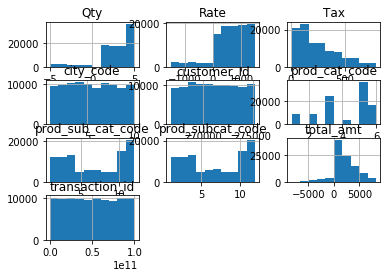

In [36]:
Conti_Vars.hist(column=Conti_Vars.columns)
plt.show()

In [37]:
import seaborn as sns

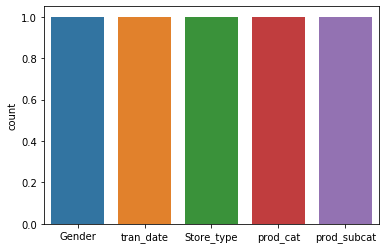

In [38]:
sns.countplot(Catog_vars.columns)

In [42]:
##4. Calculate the following information using the merged dataset :
##a. Time period of the available transaction data

In [43]:
Customer_Final.tran_date=Customer_Final.tran_date.apply(lambda x : pd.to_datetime(x))

In [44]:
Customer_Final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99434 entries, 0 to 99433
Data columns (total 17 columns):
customer_Id          99434 non-null int64
DOB                  99434 non-null datetime64[ns]
Gender               99394 non-null object
city_code            99398 non-null float64
transaction_id       99293 non-null float64
cust_id              99293 non-null Int64
tran_date            99293 non-null datetime64[ns]
prod_subcat_code     99293 non-null float64
prod_cat_code        99293 non-null float64
Qty                  99293 non-null float64
Rate                 99293 non-null float64
Tax                  99293 non-null float64
total_amt            99293 non-null float64
Store_type           99293 non-null object
prod_cat             99293 non-null object
prod_sub_cat_code    99293 non-null float64
prod_subcat          99293 non-null object
dtypes: Int64(1), datetime64[ns](2), float64(9), int64(1), object(4)
memory usage: 13.8+ MB


In [45]:
## Time period of the available transaction data is between (max-->2014-12-02 and min-->2011-01-02)

Customer_Final.tran_date.agg(['max','min'])

max   2014-12-02
min   2011-01-02
Name: tran_date, dtype: datetime64[ns]

In [46]:
## b. Count of transactions where the total amount of transaction was negative
Customer_Final.iloc[np.where(Customer_Final.total_amt < 0)].shape

(9294, 17)

In [47]:
## 5. Analyze which product categories are more popular among females vs male customers.
Customer_Final.groupby('prod_cat_code').Gender.count().sort_values(ascending=False).head(1)

prod_cat_code
5.0    36390
Name: Gender, dtype: int64

In [48]:
## 6. Which City code has the maximum customers and what was the percentage of customers from that city?
df_cpc=Customer_Final.groupby('city_code').customer_Id.count().reset_index()

In [49]:
df_cpc.rename(columns={'customer_Id':'Customer_Count'},inplace=True)

In [50]:
df_cpc['Percent_Customer']=(df_cpc.Customer_Count/df_cpc.Customer_Count.sum())*100

In [51]:
df_cpc.sort_values(by='Percent_Customer',ascending=False).head(1)

,city_code,Customer_Count,Percent_Customer
3,4.0,10584,10.648102


### Checking for unique customers in each city

In [52]:
AA1=Customer_Final.groupby('city_code').customer_Id.unique().reset_index()

In [53]:
AA1

,city_code,customer_Id
0,1.0,"[268073, 270324, 273613, 272028, 272736, 27279..."
1,2.0,"[270181, 273391, 267199, 267609, 273316, 27126..."
2,3.0,"[274602, 272821, 273016, 270780, 272627, 27045..."
3,4.0,"[268408, 275152, 275034, 274630, 273541, 27160..."
4,5.0,"[273216, 271344, 270602, 272883, 271692, 27459..."
5,6.0,"[269008, 272071, 271626, 272018, 271072, 26853..."
6,7.0,"[272455, 267657, 268275, 274717, 273871, 26964..."
7,8.0,"[269696, 268159, 266929, 273966, 270829, 26791..."
8,9.0,"[266997, 272603, 269765, 267819, 268627, 27146..."
9,10.0,"[274593, 270827, 270986, 273150, 272186, 27412..."


In [54]:
len(AA1.customer_Id[2])

595

In [55]:
def unique_customer_count(x):
    return(len(x))

In [56]:
AA1.customer_Id.apply(unique_customer_count)

0    551
1    564
2    595
3    582
4    586
5    526
6    575
7    562
8    546
9    558
Name: customer_Id, dtype: int64

In [57]:
AA1.customer_Id.apply(unique_customer_count).sum()

5645

In [60]:
AA1['No_of_Customer']=AA1.customer_Id.apply(len)

In [61]:
AA1['Per_Unique Customer']=(AA1.customer_Id.apply(unique_customer_count)/AA1.customer_Id.apply(unique_customer_count).sum())*100

In [62]:
AA1.sort_values('No_of_Customer',ascending=False).head(1)

,city_code,customer_Id,No_of_Customer,Per_Unique Customer
2,3.0,"[274602, 272821, 273016, 270780, 272627, 27045...",595,10.540301


In [63]:
## 7. Which store type sells the maximum products by value and by quantity?
Customer_Final.groupby('Store_type').total_amt.sum()

Store_type
Flagship store    4.188397e+07
MBR               4.170033e+07
TeleShop          4.046656e+07
e-Shop            8.591575e+07
Name: total_amt, dtype: float64

In [64]:
Customer_Final.groupby('Store_type').Qty.count()

Store_type
Flagship store    19814
MBR               19974
TeleShop          19320
e-Shop            40185
Name: Qty, dtype: int64

In [65]:
## 8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?
df_Flagship=Customer_Final.iloc[np.where((Customer_Final.Store_type=='Flagship store')&((Customer_Final.prod_cat=='Electronics')|(Customer_Final.prod_cat=='Clothing')))]

In [66]:
df_Flagship.total_amt.sum()

14658949.89

In [67]:
## 9. What was the total amount earned from "Male" customers under the "Electronics" category?
df_GE=Customer_Final.iloc[np.where((Customer_Final.Gender=='M')&(Customer_Final.prod_cat=='Electronics'))]

In [68]:
df_GE.total_amt.sum()

28515547.125

In [69]:
## 10. How many customers have more than 10 unique transactions, after removing all transactions 
##which have any negative amounts?

df_positive_amount=Customer_Final.iloc[np.where(Customer_Final.total_amt>0)]

In [70]:
BB1=df_positive_amount.groupby('customer_Id').transaction_id.unique().reset_index()

In [71]:
BB1

,customer_Id,transaction_id
0,266783,"[8410316370.0, 98477711300.0, 16999552161.0, 2..."
1,266784,"[36310127403.0, 26928161256.0, 54234600611.0]"
2,266785,"[17960226367.0, 96176911576.0, 72638047851.0, ..."
3,266788,"[4236411732.0, 89000309020.0, 86711622576.0, 5..."
4,266794,"[89950500283.0, 21355537809.0, 42435707527.0, ..."
...,...,...
5501,275257,"[66744674335.0, 76980013820.0, 96061314451.0, ..."
5502,275261,"[81880568368.0, 45067329959.0, 62560589211.0]"
5503,275262,"[59153499387.0, 37292690651.0]"
5504,275264,"[94712826085.0, 81382444243.0]"


In [72]:
BB1['Transaction_Count']=BB1.transaction_id.apply(len)

In [73]:
BB1.iloc[np.where(BB1.Transaction_Count>10)].shape

(6, 3)

In [74]:
##11. For all customers aged between 25 - 35, find out:
## a. What was the total amount spent for “Electronics” and “Books” product categories?

In [75]:
Customer_Final['Year_dob']=pd.DatetimeIndex(Customer_Final.DOB).year

In [76]:
Customer_Final['Age']=pd.Timestamp.now().year - Customer_Final.Year_dob

In [77]:
CC1=Customer_Final.iloc[np.where((Customer_Final.Age > 25)&(Customer_Final.Age < 35))]

In [78]:
CC1.iloc[np.where((CC1.prod_cat=='Electronics')|(CC1.prod_cat=='Books'))].total_amt.sum()

38905651.06999999

In [79]:
## b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?
Customer_Final.tran_date=Customer_Final.tran_date.astype(str)

In [80]:
Customer_Final.iloc[np.where((Customer_Final.tran_date>'2014-01-01')&(Customer_Final.tran_date<'2014-03-01'))].total_amt.sum()

5591225.965